In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

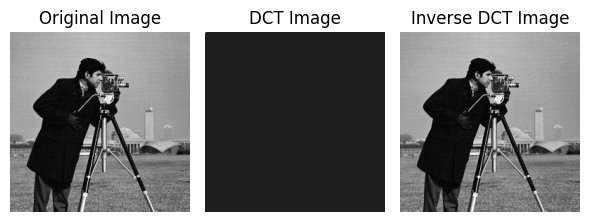

In [10]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Original-cameraman-image.png', cv2.IMREAD_GRAYSCALE)
dct_image = (cv2.dct(np.float32(img)))

img1= (cv2.idct(np.float32(dct_image)))
plt.figure(figsize=(6, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("DCT Image")
plt.imshow(dct_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Inverse DCT Image")
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

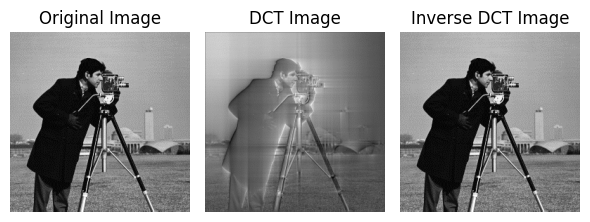

In [12]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Original-cameraman-image.png', cv2.IMREAD_GRAYSCALE)
dct_image = cv2.dct(cv2.dct(np.float32(img)))

img1= cv2.idct(cv2.idct(np.float32(dct_image)))
plt.figure(figsize=(6, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("DCT Image")
plt.imshow(dct_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("Inverse DCT Image")
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np

# Define the array I (input image)
input_image = np.array([154, 123, 123, 123, 123, 123, 123, 136, 192, 180, 136, 154, 154, 154, 136,
                        110, 254, 198, 154, 154, 180, 154, 123, 123, 239, 180, 136, 180, 180, 166,
                        123, 123, 180, 154, 136, 167, 166, 149, 136, 136, 128, 136, 123, 136, 154,
                        180, 198, 154, 123, 105, 110, 149, 136, 136, 180, 166, 110, 136, 123, 123,
                        123, 136, 154, 136])

# Subtract 128 from I to get M (mean shift)
mean_shifted_image = input_image - 128

# Initialize DCT transformation matrix T with zeros
T = np.zeros((8, 8))

# Fill in the values of T based on DCT formula
for i in range(8):
    for j in range(8):
        if i == 0:
            T[i, j] = np.sqrt(1/8)
        else:
            T[i, j] = np.sqrt(2/8) * np.cos(((2*j)+1)*i*np.pi/16)

# Perform DCT transformation on the mean-shifted image M
D = np.dot(np.dot(T, mean_shifted_image.reshape(8, 8)), T.T)

# Define quantization matrix Q
quantization_matrix = np.array([16, 11, 10, 16, 24, 40, 51, 61,
                                 12, 12, 14, 19, 26, 58, 60, 55,
                                 14, 13, 16, 24, 40, 57, 69, 56,
                                 14, 17, 22, 29, 51, 87, 80, 62,
                                 18, 22, 37, 56, 68, 109, 103, 77,
                                 24, 35, 55, 64, 81, 104, 113, 92,
                                 49, 64, 78, 87, 103, 121, 120, 101,
                                 72, 92, 95, 98, 112, 100, 103, 99])
quantization_matrix = quantization_matrix.reshape((8, 8))

# Quantize the DCT coefficients using the quantization matrix Q
C = np.round(D / quantization_matrix)

# Reconstruct the quantized DCT coefficients to obtain R
R = quantization_matrix * C

# Reconstruct the image using inverse DCT (IDCT)
reconstructed_image = np.round(np.dot(np.dot(T.T, R), T) + 128)

# Print or use the results as needed
print("Mean Shifted Image (M):")
print(mean_shifted_image)

print("\nQuantization Matrix (Q):")
print(quantization_matrix)

print("\nDCT Coefficients (D):")
print(D)

print("\nQuantized DCT Coefficients (C):")
print(C)

print("\nReconstructed DCT Coefficients (R):")
print(R)

print("\nOriginal Input Image (I):")
print(input_image)

print("\nReconstructed Image (N) after inverse DCT (IDCT):")
print(reconstructed_image)


Mean Shifted Image (M):
[ 26  -5  -5  -5  -5  -5  -5   8  64  52   8  26  26  26   8 -18 126  70
  26  26  52  26  -5  -5 111  52   8  52  52  38  -5  -5  52  26   8  39
  38  21   8   8   0   8  -5   8  26  52  70  26  -5 -23 -18  21   8   8
  52  38 -18   8  -5  -5  -5   8  26   8]

Quantization Matrix (Q):
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]

DCT Coefficients (D):
[[ 1.62250000e+02  4.05989816e+01  2.00026918e+01  7.23294009e+01
   3.02500000e+01  1.24848354e+01 -1.96505043e+01 -1.14971452e+01]
 [ 3.04792937e+01  1.08415970e+02  1.04730992e+01  3.22925175e+01
   2.76990885e+01 -1.55048925e+01  1.84075948e+01 -1.99566961e+00]
 [-9.41445075e+01 -6.00511329e+01  1.22980970e+01 -4.34188963e+01
  -3.12878702e+01  6.06690905e+00 -3.33058262e+00  7.